In [1]:
#Krishan Kumar Gupta
#VIT Bhopal
#krishan.kumar2019@vitbhopal.ac.in

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

## Image Pre-Processing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_data.flow_from_directory(r"Hand_digits\traindata",target_size=(64,64),batch_size=10,class_mode="categorical")
x_test=test_data.flow_from_directory(r"Hand_digits\testdata",target_size=(64,64),batch_size=10,class_mode="categorical")

Found 160 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
x_test.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

## Model Building

In [ ]:
model=Sequential()

In [ ]:
#add convoultion layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
# add maxpooling(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# flatten layer---input layer of ann
model.add(Flatten())

In [ ]:
# hidden layer(units,activation fucniton)
model.add(Dense(units=128,activation="relu"))

In [ ]:
# output layer(no.of neurons,activation function)
model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 30752)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               3936384   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,938,570
Trainable params: 3,938,570
Non-trainable params: 0
____________________________________________

In [ ]:
#filter values and weights

In [ ]:
# compile the model(optimizer,loss,metric)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# fit the model(x_train,steps per epoch,no.of epochs,vaidation data=test data)
model.fit(x_train,steps_per_epoch=16,epochs=30,validation_steps=5,validation_data=x_test)

Epoch 1/30
16/16 [==============================] - 1s 51ms/step - loss: 0.1146 - accuracy: 0.9688 - val_loss: 1.3637 - val_accuracy: 0.5600
Epoch 2/30
16/16 [==============================] - 1s 44ms/step - loss: 0.0780 - accuracy: 0.9875 - val_loss: 1.3609 - val_accuracy: 0.5600
Epoch 3/30
16/16 [==============================] - 1s 50ms/step - loss: 0.1033 - accuracy: 0.9875 - val_loss: 1.5886 - val_accuracy: 0.5200
Epoch 4/30
16/16 [==============================] - 1s 49ms/step - loss: 0.1211 - accuracy: 0.9812 - val_loss: 1.4465 - val_accuracy: 0.5800
Epoch 5/30
16/16 [==============================] - 1s 43ms/step - loss: 0.0970 - accuracy: 0.9875 - val_loss: 1.2635 - val_accuracy: 0.5600
Epoch 6/30
16/16 [==============================] - 1s 44ms/step - loss: 0.0921 - accuracy: 0.9812 - val_loss: 1.3938 - val_accuracy: 0.5800
Epoch 7/30
16/16 [==============================] - 1s 43ms/step - loss: 0.0720 - accuracy: 0.9875 - val_loss: 1.4441 - val_accuracy: 0.5800
Epoch 8/30
16

## Save the Model

In [ ]:
model.save("hand_digit.h5")

## Test the Model

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("hand_digit.h5")

In [ ]:
img=image.load_img(r"Hand_digits\sample1.png",target_size=(64,64))
s1=image.img_to_array(img)
s1=np.expand_dims(s1,axis=0)
s1.shape

(1, 64, 64, 3)

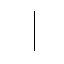

In [ ]:
index=[0,1,2,3,4,5,6,7,8,9]
img

In [ ]:
result=index[np.argmax(model.predict(s1),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 1


In [ ]:
img=image.load_img("Hand_digits\sample6.png",target_size=(64,64))
s2=image.img_to_array(img)
s2=np.expand_dims(s2,axis=0)
s2.shape

(1, 64, 64, 3)

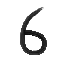

In [ ]:
img

In [ ]:
result=index[np.argmax(model.predict(s2),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 6


In [ ]:
img=image.load_img("Hand_digits\sample2.png",target_size=(64,64))
s3=image.img_to_array(img)
s3=np.expand_dims(s3,axis=0)

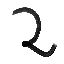

In [ ]:
img

In [ ]:
result=index[np.argmax(model.predict(s3),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 2


# End! Thank You!